In [25]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [26]:
columns = ['create_follower_count', 'destroy_follower_count', 'mutual_friends_count']
df = pd.read_csv("./twitter.csv", index_col='date', parse_dates=True)[columns]

In [57]:
# 傾向変動
def plotMovingAverage(timeSeries: pd.Series) -> pd.Series:
    return timeSeries \
        .rolling(7, center=True).mean().dropna() \
        .rolling(30, center=True).mean().dropna() \
        .plot()

<AxesSubplot:xlabel='date'>

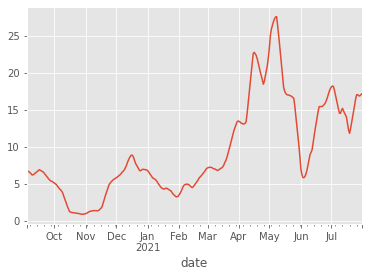

In [52]:
# 新規フォロワー数
plotMovingAverage(df.create_follower_count)

<AxesSubplot:xlabel='date'>

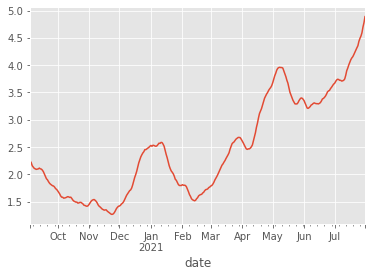

In [53]:
# フォロワー解除数
plotMovingAverage(df.destroy_follower_count)

<AxesSubplot:xlabel='date'>

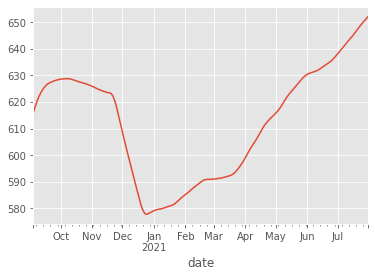

In [54]:
# 相互フォロー
plotMovingAverage(df.mutual_friends_count)